### code to simulate codeword error probability of (7, 4) block code over bsc. and compare it to theoretical codeword error probability.

Simulated codeword error probability: 0.0
Theoretical codeword error probability: 0.0
Simulated codeword error probability: 0.136
Theoretical codeword error probability: 0.14969439999999978
Simulated codeword error probability: 0.411
Theoretical codeword error probability: 0.42328319999999975
Simulated codeword error probability: 0.668
Theoretical codeword error probability: 0.6705828
Simulated codeword error probability: 0.838
Theoretical codeword error probability: 0.8413696
Simulated codeword error probability: 0.94
Theoretical codeword error probability: 0.9375
Simulated codeword error probability: 0.986
Theoretical codeword error probability: 0.9811584
Simulated codeword error probability: 0.998
Theoretical codeword error probability: 0.9962092
Simulated codeword error probability: 0.999
Theoretical codeword error probability: 0.9996288
Simulated codeword error probability: 1.0
Theoretical codeword error probability: 0.9999936
Simulated codeword error probability: 1.0
Theoretical 

Text(0, 0.5, 'CodeWord error probability')

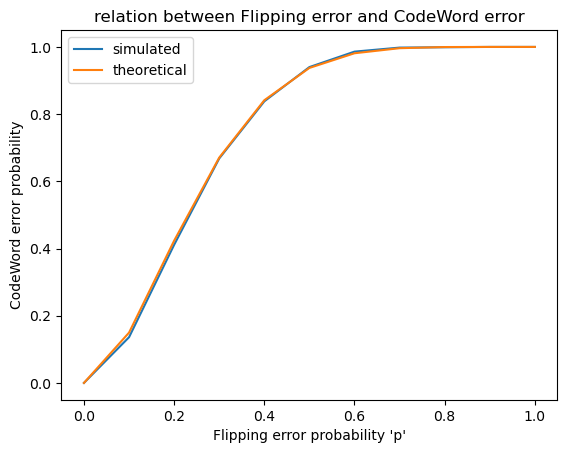

In [1]:
import numpy as np
import random
from scipy.special import comb
import matplotlib.pyplot as plt

#Define binary symmetric channel
def bsc(input_bits, p):
    output_bits = np.copy(input_bits)  # create a copy of the input sequence
    errors = np.random.rand(len(input_bits)) < p  # generate random errors based on p
    output_bits[errors] = 1 - output_bits[errors]  # flip the bits with errors
    return output_bits

# Define the generator matrix for a (7, 4) block code
G = np.array([[1, 0, 0, 0, 1, 1, 0],
              [0, 1, 0, 0, 1, 0, 1],
              [0, 0, 1, 0, 0, 1, 1],
              [0, 0, 0, 1, 1, 1, 1]])

# Define the parity-check matrix for the same code
H = np.array([[1, 1, 0, 1, 1, 0, 0],
              [1, 0, 1, 1, 0, 1, 0],
              [0, 1, 1, 1, 0, 0, 1]])

# Define the number of simulations to run
num_simulations = 1000

# Initialize a variable to count the number of codeword errors
num_codeword_errors = 0

#np.array는 float형의 소수점 이하 자리는 없앤다. 따라서 list로 선언
simulated_p_error = [0,0,0,0,0,0,0,0,0,0,0]
theoretical_p_error = [0,0,0,0,0,0,0,0,0,0,0]

for j in range(11):
    p = j * 0.1
    num_codeword_errors = 0
    # Simulate the transmission of random messages through the BSC
    for i in range(num_simulations):
        # Generate a random message vector of length 4
        m = np.random.randint(2, size=4)
    
        # Encode the message to a codeword of length 7
        c = np.dot(m, G) % 2
    
        output_bits = bsc(c, p)  # simulate the BSC
    
        # Decode the received vector using the parity-check matrix
        syndrome = np.dot(output_bits, H.T) % 2
    
        if sum(syndrome) > 0:
            for i in range(len(H.T)):
                if np.array_equal(syndrome,H.T[i,:]):
                    output_bits[i] = (output_bits[i] + 1)%2
                    msg = output_bits[:4]
        else : 
            msg = output_bits[:4]

        # Check if the syndrome is nonzero, indicating a codeword error
        if not np.array_equal(msg,m):
            num_codeword_errors += 1
            
    # Calculate the simulated codeword error probability
    simulated_p_error[j] = num_codeword_errors / num_simulations

    # Calculate the theoretical codeword error probability
    theoretical_p_error[j] = 1 - ((1-p)**7 + 7 * p * (1-p)**6)

    # Print the results
    print("Simulated codeword error probability:", simulated_p_error[j])
    print("Theoretical codeword error probability:", theoretical_p_error[j])
    
    
prob = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
plt.plot(prob,simulated_p_error, label='simulated')
plt.plot(prob,theoretical_p_error, label='theoretical')
plt.legend()
plt.title('relation between Flipping error and CodeWord error') 
plt.xlabel("Flipping error probability 'p'") 
plt.ylabel("CodeWord error probability")